# Week 10

Context information: The dataset I used is the Statlog Heart Disease dataset from Kaggle, which includes 14 features related to cardiovascular health. The chosen project was based on cardiovascular disease (CVD). This project examines data related to CVD in order to analyze healthcare utilization and risk factors. The dataset, Statlog Heart Disease, included medical attributes from 270 individuals. These included blood pressure, cholesterol, and heart rate, utilizing said data to predict the presence of heart disease. The project strived to discover trends in healthcare to identify key risk factors for cardiovascular disease and thus inform on new strategies for disease prevention and management.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

In [2]:
pip install scikit-learn-extra


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('Heart_disease_statlog.csv')

In [4]:
print("Shape:", df.shape)
display(df.head())
display(df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nColumn names:\n", df.columns)

Shape: (270, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000



Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Column names:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [5]:
X = df.drop('target', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Elbow Method & Silhouette Scores for K-Means

In [6]:
wcss = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

Plot WCSS

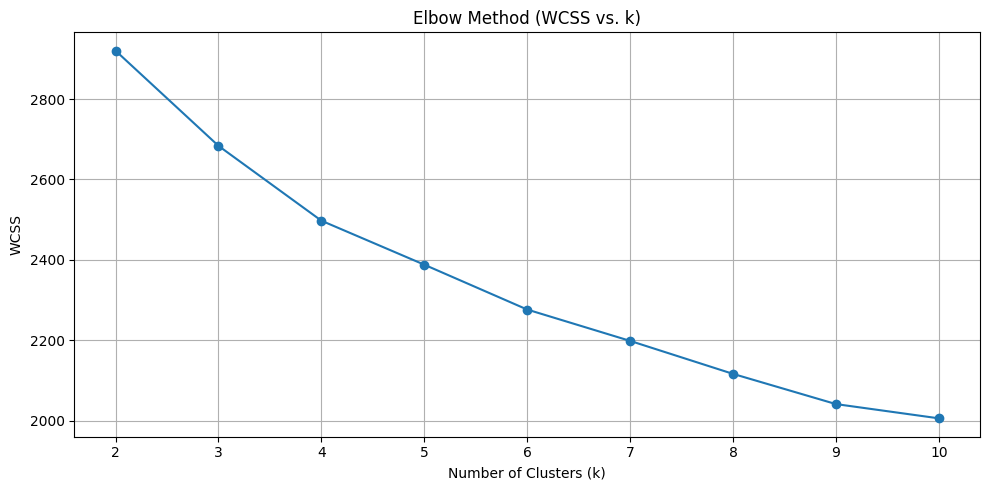

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method (WCSS vs. k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.show()

Plot Silhouette Scores

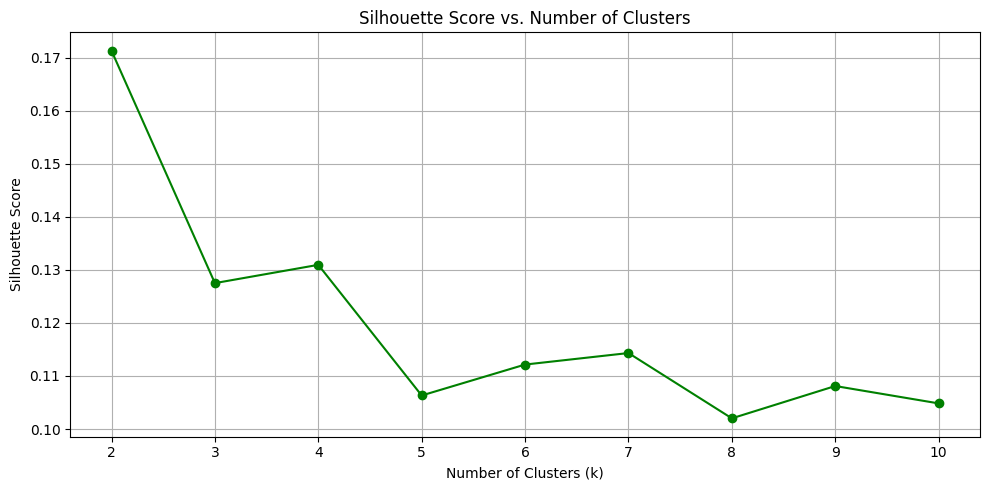

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

Best K from Silhouette Score

In [9]:
best_k = k_values[np.argmax(silhouette_scores)]
best_k_score = max(silhouette_scores)
print(f"\nBest k from silhouette score: {best_k} (score = {best_k_score:.4f})")


Best k from silhouette score: 2 (score = 0.1713)


Final K-Means Model

In [10]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(X_scaled)
print(f"K-Means clustering complete using Euclidean distance with k = {best_k}")
print(f"K-Means Silhouette Score: {best_k_score:.4f}")

K-Means clustering complete using Euclidean distance with k = 2
K-Means Silhouette Score: 0.1713


K-Medoids with Manhattan Distance

In [11]:
kmedoids = KMedoids(n_clusters=best_k, metric='manhattan', random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)

print(f"\nK-Medoids clustering complete using Manhattan distance with k = {best_k}")
print(f"K-Medoids Silhouette Score: {kmedoids_silhouette:.4f}")


K-Medoids clustering complete using Manhattan distance with k = 2
K-Medoids Silhouette Score: 0.1118


DBSCAN Clustering

In [12]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

core_mask = dbscan_labels != -1
if core_mask.sum() > 1 and len(np.unique(dbscan_labels[core_mask])) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[core_mask], dbscan_labels[core_mask])
else:
    dbscan_silhouette = None

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_points = np.sum(dbscan_labels == -1)

print(f"\nDBSCAN clustering complete with eps = 1.5, min_samples = 5")
print(f"DBSCAN Clusters Found (excluding noise): {n_clusters_dbscan}")
print(f"DBSCAN Noise Points: {n_noise_points}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette if dbscan_silhouette else 'Not computable'}")


DBSCAN clustering complete with eps = 1.5, min_samples = 5
DBSCAN Clusters Found (excluding noise): 2
DBSCAN Noise Points: 252
DBSCAN Silhouette Score: 0.6963953539572221


Cluster Distribution Visualization (K-Means)

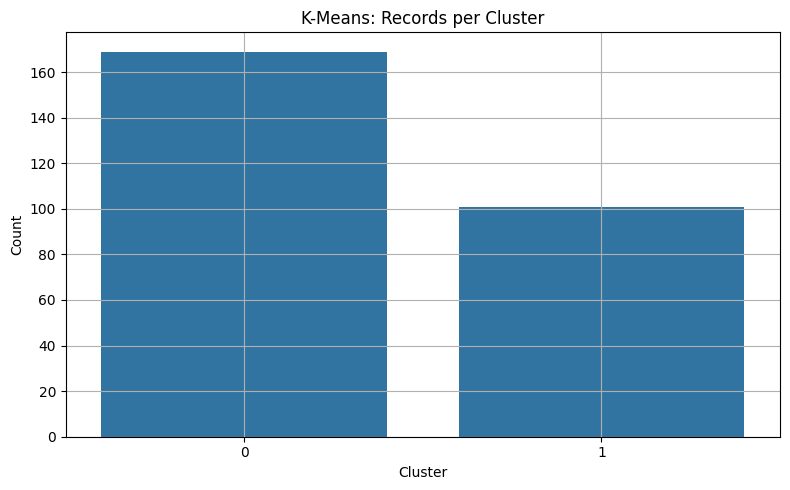

In [13]:
df_kmeans = df.copy()
df_kmeans['cluster'] = kmeans_labels

plt.figure(figsize=(8, 5))
sns.countplot(data=df_kmeans, x='cluster')
plt.title('K-Means: Records per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

Average Values per Cluster

In [14]:
display(df_kmeans.groupby('cluster').mean())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
cluster,,,,,,,,,,,,,,
0,52.130178,0.591716,1.828402,129.177515,244.159763,0.130178,0.893491,159.905325,0.118343,0.568639,0.360947,0.319527,1.414201,0.189349
1,58.287129,0.821782,2.752475,134.970297,258.861386,0.178218,1.237624,132.564356,0.683168,1.855446,0.960396,1.257426,2.504950,0.871287
